# Problem Set 2 (Total: 64 points)

<b>A Small Intro </b>

For this assignment, we will be using Cook County's (in Illinois) sentencing dataset. This dataset reports the sentence given to defendants convicted of different crimes.

# 0. Load packages and imports

In [1]:
## basic functionality
import pandas as pd
import numpy as np
import re

## plotting
## note: you likely need to install this using
## pip or conda; you can delete this line
## if you're using matplotlib, seaborn, or other
## plotting pkg
# import plotnine
# from plotnine import *

## repeated printouts
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## datetime util
from dateutil.relativedelta import relativedelta


## 0.1 Load the data (0 points)

Use `pd.read_csv` to load the `sentencing_asof0405.csv` data (make sure to unzip the `pset2_inputdata` folder and not hard code your user-specific path name)

*Notes*: You may receive a warning about mixed data types upon import; feel free to ignore

In [2]:
import zipfile
with zipfile.ZipFile("pset2_inputdata.zip","r") as zip_ref:
    zip_ref.extractall("pset2_inputdata")

df = pd.read_csv("pset2_inputdata/sentencing_asof0405.csv")

<ipython-input-2-45ab80392451>:5: DtypeWarning: Columns (10,11,14,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("pset2_inputdata/sentencing_asof0405.csv")


## 0.2 Print head, dimensions, info for the data (0 points)

In [3]:
display(df.head())
print(df.shape) 
display(df.info())

,CASE_ID,CASE_PARTICIPANT_ID,RECEIVED_DATE,OFFENSE_CATEGORY,PRIMARY_CHARGE_FLAG,CHARGE_ID,CHARGE_VERSION_ID,DISPOSITION_CHARGED_OFFENSE_TITLE,CHARGE_COUNT,DISPOSITION_DATE,...,INCIDENT_CITY,INCIDENT_BEGIN_DATE,INCIDENT_END_DATE,LAW_ENFORCEMENT_AGENCY,LAW_ENFORCEMENT_UNIT,ARREST_DATE,FELONY_REVIEW_DATE,FELONY_REVIEW_RESULT,ARRAIGNMENT_DATE,UPDATED_OFFENSE_CATEGORY
0,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50510112469,116304211997,FIRST DEGREE MURDER,2,12/17/2014 12:00:00 AM,...,NaN,8/9/1984 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,8/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,9/21/1984 12:00:00 AM,Homicide
1,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50510213021,98265074680,HOME INVASION,14,12/17/2014 12:00:00 AM,...,NaN,8/9/1984 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,8/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,9/21/1984 12:00:00 AM,Homicide
2,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50516447217,131972895911,FIRST DEGREE MURDER,4,12/17/2014 12:00:00 AM,...,NaN,8/9/1984 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,8/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,9/21/1984 12:00:00 AM,Homicide
3,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50516497493,131966356472,FIRST DEGREE MURDER,5,12/17/2014 12:00:00 AM,...,NaN,8/9/1984 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,8/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,9/21/1984 12:00:00 AM,Homicide
4,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50516648320,98059642859,HOME INVASION,13,12/17/2014 12:00:00 AM,...,NaN,8/9/1984 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,8/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,9/21/1984 12:00:00 AM,Homicide


(248146, 41)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248146 entries, 0 to 248145
Data columns (total 41 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   CASE_ID                            248146 non-null  int64  
 1   CASE_PARTICIPANT_ID                248146 non-null  int64  
 2   RECEIVED_DATE                      248146 non-null  object 
 3   OFFENSE_CATEGORY                   248146 non-null  object 
 4   PRIMARY_CHARGE_FLAG                248146 non-null  bool   
 5   CHARGE_ID                          248146 non-null  int64  
 6   CHARGE_VERSION_ID                  248146 non-null  int64  
 7   DISPOSITION_CHARGED_OFFENSE_TITLE  248146 non-null  object 
 8   CHARGE_COUNT                       248146 non-null  int64  
 9   DISPOSITION_DATE                   248146 non-null  object 
 10  DISPOSITION_CHARGED_CHAPTER        248146 non-null  object 
 11  DISPOSITION_CHARGED_ACT   

None

# Part one: data cleaning/interpretation (28 points)

## 1.1: Understanding the unit of analysis (5 points)


### 1.1.1 Print the number of unique values for the following columns. Do so in a way that avoids copying/pasting code for the three (eg apply):

    - Cases (CASE_ID)
    - People (CASE_PARTICIPANT_ID)
    - Charges (CHARGE_ID)


**Sources for this question**: slide 21 here on column-wise apply: https://github.com/rebeccajohnson88/PPOL564_slides_activities/blob/main/slides/fall_22/02_ppol564_f22_datawrangling.pdf

In [4]:
print(df[["CASE_ID", "CASE_PARTICIPANT_ID", "CHARGE_ID"]].nunique())

CASE_ID                197519
CASE_PARTICIPANT_ID    211977
CHARGE_ID              229015
dtype: int64


### 1.1.2   Write a couple sentences on the following and show an example of each (e.g., a case involving multiple people):
   
- Why there are more unique people than unique cases?
- Why there are more unique charges than unique people?

**Resources**: groupby and agg covered in:
- This activity: https://github.com/rebeccajohnson88/PPOL564_slides_activities/blob/main/activities/fall_22/solutions/01_pandas_datacleaning_solutions.ipynb

- These lecture slides: https://github.com/rebeccajohnson88/PPOL564_slides_activities/blob/main/slides/fall_22/02_ppol564_f22_datawrangling.pdf

There are more unique people than cases because there can be multiple people involved in a single case. There are more unique charges than unique people because a person can be charged with multiple things.


In [5]:
tmp = df.groupby(["CASE_ID"]).agg({"CASE_PARTICIPANT_ID": lambda x: x.nunique() > 1}).reset_index()
display(df[df["CASE_ID"].isin(tmp[tmp["CASE_PARTICIPANT_ID"]]["CASE_ID"])] \
        .groupby("CASE_ID")["CASE_PARTICIPANT_ID"].unique())

CASE_ID
166402790922                         [144234439761, 144234534133]
176098576921                         [174622577027, 175474569409]
176270837451                         [177970997688, 178547234450]
180953886081                         [178720596215, 178720690587]
181880245351    [179640159105, 179640253478, 179640347850, 180...
                                      ...                        
442924851235                         [896435751939, 896435846311]
443338247136                         [897930230381, 897930324753]
443405066012                         [898178051825, 898178146197]
443440604843                         [898306586785, 898306681158]
443593921120                         [898848472060, 898848660805]
Name: CASE_PARTICIPANT_ID, Length: 12288, dtype: object

In [6]:
display(tmp)

,CASE_ID,CASE_PARTICIPANT_ID
0,149765331439,False
1,150065796098,False
2,154524891354,False
3,154954734978,False
4,155222744754,False
...,...,...
197514,445516248775,False
197515,445527409730,False
197516,445587767000,False
197517,445592613204,False


There are more unique charges than unique people because a person can be charged with multiple things.

In [7]:
tmp = df.groupby(["CASE_PARTICIPANT_ID"]).agg({"CHARGE_ID": lambda x: x.nunique() > 1}).reset_index()
print(df[df["CASE_PARTICIPANT_ID"]\
         .isin(tmp[tmp["CHARGE_ID"]]["CASE_PARTICIPANT_ID"])]\
      .groupby("CASE_PARTICIPANT_ID")["CHARGE_ID"].unique())

CASE_PARTICIPANT_ID
97581722610     [138443602912, 138495990272, 138496040547, 138...
97603050731                          [132499497789, 132499447513]
102758793737                         [135919507524, 135919356697]
113431347854    [140816921244, 140816971520, 140817021796, 140...
117303251208    [152154963662, 152155114490, 152181609824, 152...
                                      ...                        
901692945079                         [446463430104, 445755949369]
901899525864           [445868567109, 446029349044, 445868617385]
904336027784                         [447990908763, 447302935029]
904972002160                         [448033894552, 447647575481]
905015885242                         [447956771510, 447671858681]
Name: CHARGE_ID, Length: 14547, dtype: object



### 1.1.3 Finding mean and median 

- Print the mean and median number of charges per `CASE_PARTICIPANT_ID`

- Print the mean and median number of participants per `CASE_ID`


In [8]:
print(df.groupby("CASE_PARTICIPANT_ID")["CHARGE_ID"].nunique().mean())
print(df.groupby("CASE_PARTICIPANT_ID")["CHARGE_ID"].nunique().median())
print(df.groupby("CASE_ID")["CASE_PARTICIPANT_ID"].nunique().mean())
print(df.groupby("CASE_ID")["CASE_PARTICIPANT_ID"].nunique().median())

1.1261457610967227
1.0
1.0731980214561636
1.0


### 1.1.4 Does the data seem to enable us to follow the same defendant across different cases they're charged in? Write 1 sentence in support of your conclusion.

Yes - the case_participant_id field seems to be a unique identifier for a person associated with a case, enabling them to be followed across both charges and cases.

## 1.2.1 Which offense is final? (3 points)

- First, read the data documentation (link here: https://datacatalog.cookcountyil.gov/api/views/tg8v-tm6u/files/8597cdda-f7e1-44d1-b0ce-0a4e43f8c980?download=true&filename=CCSAO%20Data%20Glossary.pdf) and summarize in your own words the differences between `OFFENSE_CATEGORY` and `UPDATED_OFFENSE_CATEGORY` 

- Construct an indicator `is_changed_offense` that's True for case-participant-charge observations (rows) where there's a difference between the `OFFENSE_CATEGORY` and the `UPDATED_OFFENSE_CATEGORY`. What are some of the more common changed offenses? (can just print result of sort_values based on `OFFENSE_CATEGORY`)

- Print one example of a changed offense from one of these categories and comment on what the reason may be

**Resources**: row subsetting, groupby/agg, and np.where covered in lecture slides
 

OFFENSE_CATEGORY is an initial, general classification. UPDATED_OFFENSE_CATEGORY is the category of the specific primary charge.

In [9]:
is_changed_offense = df["OFFENSE_CATEGORY"] != df["UPDATED_OFFENSE_CATEGORY"]
df[is_changed_offense].sort_values("OFFENSE_CATEGORY")[["OFFENSE_CATEGORY", "UPDATED_OFFENSE_CATEGORY"]].value_counts()
df[is_changed_offense].groupby("OFFENSE_CATEGORY")["UPDATED_OFFENSE_CATEGORY"].unique()

OFFENSE_CATEGORY                        UPDATED_OFFENSE_CATEGORY         
DUI                                     Aggravated DUI                       3670
PROMIS Conversion                       Domestic Battery                     1677
UUW - Unlawful Use of Weapon            Narcotics                            1496
PROMIS Conversion                       Homicide                             1491
                                        Narcotics                            1401
                                                                             ... 
Failure to Register as a Sex Offender   Aggravated Battery Police Officer       1
                                        Burglary                                1
Retail Theft                            Aggravated Battery With A Firearm       1
Failure to Register as a Sex Offender   Disarming Police Officer                1
Violation of Sex Offender Registration  Violation Order Of Protection           1
Length: 1176, dtype: int

OFFENSE_CATEGORY
Aggravated Assault Police Officer            [Aggravated Battery Police Officer, Aggravated...
Aggravated Assault Police Officer Firearm    [UUW - Unlawful Use of Weapon, Attempt Homicid...
Aggravated Battery                           [Domestic Battery, Aggravated Battery With A F...
Aggravated Battery Police Officer            [Aggravated Battery With A Firearm, UUW - Unla...
Aggravated Battery Police Officer Firearm    [UUW - Unlawful Use of Weapon, Aggravated Batt...
                                                                   ...                        
Vehicular Hijacking                          [Armed Robbery, Aggravated Battery With A Fire...
Vehicular Invasion                           [Robbery, Armed Robbery, Aggravated Battery Wi...
Violate Bail Bond                                               [UUW - Unlawful Use of Weapon]
Violation Order Of Protection                [Domestic Battery, Identity Theft, UUW - Unlaw...
Violation of Sex Offender Registr

One example of a changed offense is "Vehicular Hijacking" being updated to "Armed Robbery". This may be a reflection of the specific cases of the more general vehicular hijacking.

## 1.2.2 Simplifying the charges (5 points)

Using the field (`UPDATED_OFFENSE_CATEGORY`), create a new field, `simplified_offense_derived`, that simplifies the many offense categories into broader buckets using the following process:

First, create a new variable that strips "Aggravated" from the UPDATED_OFFENSE_CATEGORY (e.g., Aggravated Battery and Battery just becomes Battery)

**Resources**: slide 25 of this lecture has str.replace (example with stripping the name johnson from a last name): https://github.com/rebeccajohnson88/PPOL564_slides_activities/blob/main/slides/fall_22/02_ppol564_f22_datawrangling.pdf

In [10]:
### first, strip aggravated
df["simplified_offense_category"] = df["UPDATED_OFFENSE_CATEGORY"].str.replace("Aggravated", "")


Then:
- Combine all offenses with arson in the string into a single arson category (`Arson`)
- Combine all offenses with homicide in the string into a single homicide category (`Homicide`)
- Combine all offenses with vehicle/vehicular in the string into a single vehicle category (`Vehicle-related`)
- Combine all offenses with battery in the string into a single battery category (`Battery`)

Do so efficiently (e.g., using map and a dictionary or np.select rather than separate line for each recoded offense)

**Resources**:
- Activity code and lecture 2 slides cover np.select and map.recode (can use one or the other)

In [11]:
df["simplified_offense_derived"] = np.select([df["simplified_offense_category"].str.contains("Arson"),
                                              df["simplified_offense_category"].str.contains("Homicide"),
                                             ((df["simplified_offense_category"].str.contains("Vehicle")) | 
                                              (df["simplified_offense_category"].str.contains("Vehicular"))),
                                             df["simplified_offense_category"].str.contains("Battery")], 
                                             ["Arson", "Homicide", "Vehicle-related", "Battery"], 
                                             default=df["simplified_offense_category"])
df["simplified_offense_derived"] = [re.sub(r"^\s+", "", offense) for offense in df["simplified_offense_derived"]]

display(df)

,CASE_ID,CASE_PARTICIPANT_ID,RECEIVED_DATE,OFFENSE_CATEGORY,PRIMARY_CHARGE_FLAG,CHARGE_ID,CHARGE_VERSION_ID,DISPOSITION_CHARGED_OFFENSE_TITLE,CHARGE_COUNT,DISPOSITION_DATE,...,INCIDENT_END_DATE,LAW_ENFORCEMENT_AGENCY,LAW_ENFORCEMENT_UNIT,ARREST_DATE,FELONY_REVIEW_DATE,FELONY_REVIEW_RESULT,ARRAIGNMENT_DATE,UPDATED_OFFENSE_CATEGORY,simplified_offense_category,simplified_offense_derived
0,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50510112469,116304211997,FIRST DEGREE MURDER,2,12/17/2014 12:00:00 AM,...,NaN,CHICAGO POLICE DEPT,NaN,8/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,9/21/1984 12:00:00 AM,Homicide,Homicide,Homicide
1,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50510213021,98265074680,HOME INVASION,14,12/17/2014 12:00:00 AM,...,NaN,CHICAGO POLICE DEPT,NaN,8/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,9/21/1984 12:00:00 AM,Homicide,Homicide,Homicide
2,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50516447217,131972895911,FIRST DEGREE MURDER,4,12/17/2014 12:00:00 AM,...,NaN,CHICAGO POLICE DEPT,NaN,8/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,9/21/1984 12:00:00 AM,Homicide,Homicide,Homicide
3,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50516497493,131966356472,FIRST DEGREE MURDER,5,12/17/2014 12:00:00 AM,...,NaN,CHICAGO POLICE DEPT,NaN,8/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,9/21/1984 12:00:00 AM,Homicide,Homicide,Homicide
4,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50516648320,98059642859,HOME INVASION,13,12/17/2014 12:00:00 AM,...,NaN,CHICAGO POLICE DEPT,NaN,8/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,9/21/1984 12:00:00 AM,Homicide,Homicide,Homicide
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248141,445516248775,905289187184,2/3/2021 12:00:00 AM,Home Invasion,True,447867029248,836341344232,AGGRAVATED UNLAWFUL USE OF WEAPON,1,3/19/2021 12:00:00 AM,...,NaN,DES PLAINES PD,NaN,2/2/2021 2:20:00 PM,02/04/2021 12:00:00 AM,Approved,3/19/2021 12:00:00 AM,UUW - Unlawful Use of Weapon,UUW - Unlawful Use of Weapon,UUW - Unlawful Use of Weapon
248142,445527409730,905322500577,2/4/2021 12:00:00 AM,Domestic Battery,True,447970697900,836537247156,DOMESTIC BATTERY,1,3/23/2021 12:00:00 AM,...,NaN,COOK COUNTY SHERIFF'S POLICE PATROL MAYWOOD (I...,NaN,2/9/2021 11:25:00 AM,02/10/2021 12:00:00 AM,Approved,3/11/2021 12:00:00 AM,Domestic Battery,Domestic Battery,Battery
248143,445587767000,905518794790,2/9/2021 12:00:00 AM,Driving With Suspended Or Revoked License,True,447955866546,837760215766,DRIVING ON SUSPENDED LICENSE,1,3/11/2021 12:00:00 AM,...,NaN,BERWYN PD,NaN,2/4/2021 4:35:00 PM,NaN,NaN,3/9/2021 12:00:00 AM,Driving With Suspended Or Revoked License,Driving With Suspended Or Revoked License,Driving With Suspended Or Revoked License
248144,445592613204,905533705601,2/9/2021 12:00:00 AM,Driving With Suspended Or Revoked License,True,447966223356,837758347354,DRIVING ON SUSPENDED LICENSE,1,3/11/2021 12:00:00 AM,...,NaN,BERWYN PD,NaN,2/4/2021 4:35:00 PM,NaN,NaN,3/9/2021 12:00:00 AM,Driving With Suspended Or Revoked License,Driving With Suspended Or Revoked License,Driving With Suspended Or Revoked License


Print the difference between the # of unique offenses in the original `UPDATED_OFFENSE_CATEGORY` field and the # of unique offenses in your new `simplified_offense_derived` field. How many and which ones change?

In [12]:
# Number of unique offenses in UPDATED_OFFENSE_CATEGORY and simplified_offense_derived
df[["UPDATED_OFFENSE_CATEGORY", "simplified_offense_derived"]].nunique()

# Unique offenses in UPDATED_OFFENSE_CATEGORY and simplified_offense_derived
df[["UPDATED_OFFENSE_CATEGORY", "simplified_offense_derived"]].apply(pd.Series.unique)

# Unique offenses in UPDATED_OFFENSE_CATEGORY that are not present in simplified_offense_category
df[np.where(~df["UPDATED_OFFENSE_CATEGORY"]\
            .isin(df["simplified_offense_derived"]), True, False)]["UPDATED_OFFENSE_CATEGORY"].unique()

# Unique offenses in simplified_offense_category that are not present in UPDATED_OFFENSE_CATEGORY
df[np.where(~df["simplified_offense_derived"]\
            .isin(df["UPDATED_OFFENSE_CATEGORY"]), True, False)]["simplified_offense_derived"].unique()

UPDATED_OFFENSE_CATEGORY      79
simplified_offense_derived    65
dtype: int64

UPDATED_OFFENSE_CATEGORY      [Homicide, PROMIS Conversion, Narcotics, Retai...
simplified_offense_derived    [Homicide, PROMIS Conversion, Narcotics, Retai...
dtype: object

array(['Domestic Battery', 'Attempt Homicide',
       'Aggravated Fleeing and Eluding', 'Aggravated DUI',
       'Reckless Homicide', 'Possession of Stolen Motor Vehicle',
       'Aggravated Battery With A Firearm', 'Aggravated Battery',
       'Aggravated Discharge Firearm',
       'Aggravated Battery Police Officer', 'Aggravated Identity Theft',
       'Aggravated Robbery', 'Vehicular Hijacking', 'Attempt Arson',
       'Arson and Attempt Arson', 'Aggravated Assault Police Officer',
       'Attempt Vehicular Hijacking', 'Vehicular Invasion'], dtype=object)

array(['Fleeing and Eluding', 'Vehicle-related', 'Discharge Firearm',
       'Assault Police Officer'], dtype=object)

## 1.3 Cleaning additional variables (10 points)

Clean the following variables; make sure to retain the original variable in data; we tell you to use the derived suffix so it's easier to pull these cleaned out variables later 

### 1.3.1 
- Race: create True/false indicators for `is_black_derived` (Black only or `White/Black [Hispanic or Latino]`), `is_hisp_derived` (Non-Black Hispanic, so either hispanic alone or white hispanic), `is_white_derived` (White non-hispanic), or `is_other_derived` (none of the above)

### 1.3.2
- Gender: create a boolean true/false indicator for `is_male_derived` (false is female, unknown, or other)

### 1.3.3
- Age at incident: you notice outliers like 130-year olds. Recode the top 0.01% of values to be equal to the 99.99th percentile value (this is sometimes called `winsorizing` but don't worry about the terminology). Call this `age_derived`

**Resources**: `np.where` slides linked to above 


In [13]:
#pd.set_option('display.max_columns', None)

is_black_derived = df["RACE"].str.upper().isin(["BLACK", "WHITE/BLACK [HISPANIC OR LATINO]"])
is_hisp_derived = df["RACE"].str.upper().isin(["HISPANIC", "WHITE [HISPANIC OR LATINO]"])
is_white_derived = df["RACE"].str.upper() == "WHITE"
is_other_derived = ~is_black_derived & ~is_hisp_derived & ~is_white_derived

In [14]:
is_male_derived = np.where(df["GENDER"] == "Male", True, False)

In [15]:
df["age_derived"] = np.where(df["AGE_AT_INCIDENT"] > df["AGE_AT_INCIDENT"].quantile(.9999), df["AGE_AT_INCIDENT"].quantile(.9999), df["AGE_AT_INCIDENT"])

### 1.3.4
- Create `sentenceymd_derived` that's a version of `SENTENCING_DATE` converted to datetime format. Also create a rounded version, `sentenceym_derived`, that's rounded down to the first of the month and the year (e.g., 01-05-2016 and 01-27-2016 each become 01-01-2016)
    - Hint: all timestamps are midnight so you can strip the timestamp. Before converting, you'll notice that some of the years have been mistranscribed (e.g., 291X or 221X instead of 201X). Programatically fix those (eg 2914 -> 2014). You can use this regex code to clean the dates or write your own pattern: https://github.com/rebeccajohnson88/PPOL564_slides_activities/issues/20
    
Even after cleaning, there will still be some that are after the year 2021 that we'll filter out later.

**Resources**:

- pd.to_datetime() used in this activity: https://github.com/rebeccajohnson88/PPOL564_slides_activities/blob/main/activities/fall_22/solutions/01_pandas_datacleaning_solutions.ipynb 
- extract the month and year from a datetime object using the dt accessor (similar syntax for year): https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.month.html 


In [16]:
df["sentenceymd_derived"] = pd.to_datetime([re.sub(r'2[1-9]([0-9]+)', r"20\1", str(date)) 
                             if bool(re.search('\/2[1-9][0-9]+', str(date))) else 
                            str(date) 
                            for date in 
                            df.SENTENCE_DATE])

In [17]:
df["sentenceym_derived"] = df["sentenceymd_derived"].apply(lambda x: x.replace(day=1))

### 1.3.5

- Sentencing judge: create an identifier (`judgeid_derived`) for each unique judge (`SENTENCE_JUDGE`) structured as judge_1, judge_2.... When finding unique judges, there are various duplicates we could weed out --- for now, just focus on (1) the different iterations of Doug/Douglas Simpson, (2) the different iterations of Shelley Sutker (who appears both with her maiden name and her hyphenated married name). Note that you can do this more manually by creating a list with the different name variations and receive full credit (eg no need to use regular expressions).
     - Hint: due to mixed types, you may need to cast the `SENTENCE_JUDGE` var to a diff type in order to be able to sort


In [18]:
tmp_judge_list = df["SENTENCE_JUDGE"]
tmp_judge_list_clean = [re.sub(r"-[A-Za-z\s]*", "", 
                               str(name)) if "-" in str(name) 
                        else (re.sub(r"(\S+)(las)( J)? ", "\g<1> ", name) 
                              if bool(re.search(r"\S*(las)? J", str(name))) 
                              else name) for name in tmp_judge_list]
remove_extra_spaces = [re.sub(r"\s{2,}?", " ", str(name)) if bool(re.search(r"\s{2,}?", str(name))) else name for name in tmp_judge_list_clean]
judges = pd.DataFrame(remove_extra_spaces)
df["judgeid_derived"] = judges.transform(lambda x: pd.CategoricalIndex(x).codes + 1)
df["judgeid_derived"] = df["judgeid_derived"].apply(lambda x: "judgeid_" + str(x))


After finishing, print a random sample of 10 rows with the original and cleaned columns for the relevant variables

**Resources**: sample command here: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html

In [19]:
df["cleaned_judge_names"] = judges
df[["SENTENCE_JUDGE", "cleaned_judge_names", "judgeid_derived"]].sample(10)

,SENTENCE_JUDGE,cleaned_judge_names,judgeid_derived
135423,Bridget Jane Hughes,Bridget Jane Hughes,judgeid_22
169990,Paula M Daleo,Paula M Daleo,judgeid_246
201324,Michele M Pitman,Michele M Pitman,judgeid_229
127228,Mary C Roberts,Mary C Roberts,judgeid_204
176549,Stanley Sacks,Stanley Sacks,judgeid_284
186880,Earl B Hoffenberg,Earl B Hoffenberg,judgeid_73
121648,Thomas V Gainer,Thomas V Gainer,judgeid_311
235165,"Byrne, Thomas","Byrne, Thomas",judgeid_23
132885,Stanley Sacks,Stanley Sacks,judgeid_284
153630,Joseph G Kazmierski,Joseph G Kazmierski,judgeid_153


## 1.4 Subsetting rows to analytic dataset (5 points)

You decide based on the above to simplify things in the following ways:
    
- Subset to cases where only one participant is charged, since cases with >1 participant might have complications like 
plea bargains/informing from other participants affecting the sentencing of the focal participant

- To go from a participant-case level dataset, where each participant is repeated across charges tied to the case, to a participant-level dataset, where each participant has one charge, subset to a participant's primary charge and their current sentence (`PRIMARY_CHARGE_FLAG` is True and `CURRENT_SENTENCE_FLAG` is True). Double check that this worked by confirming there are no longer multiple charges for the same case-participant

- Filter out observations where judge is nan or nonsensical (indicated by is.null or equal to FLOOD)

- Subsetting to sentencing date between 01-01-2012 and 04-05-2021 (inclusive)

In [20]:
one_charged = df.groupby(["CASE_ID"]).agg({"CASE_PARTICIPANT_ID": lambda x: x.nunique() == 1}).reset_index()

subset = df[(df["CASE_ID"].isin(one_charged[one_charged["CASE_PARTICIPANT_ID"] == True]["CASE_ID"])) 
            & (df["PRIMARY_CHARGE_FLAG"] == True) 
           & (df["CURRENT_SENTENCE_FLAG"] == True)]

assert subset.groupby(["CASE_PARTICIPANT_ID", "CASE_ID"])["CHARGE_ID"].nunique().max() == 1

subset = subset[(~subset["SENTENCE_JUDGE"].isnull()) & (subset["SENTENCE_JUDGE"] != "FLOOD")]
subset = subset[(subset["sentenceymd_derived"] >= "01-01-2012") & (subset["sentenceymd_derived"] <= "04-05-2021")]
subset

,CASE_ID,CASE_PARTICIPANT_ID,RECEIVED_DATE,OFFENSE_CATEGORY,PRIMARY_CHARGE_FLAG,CHARGE_ID,CHARGE_VERSION_ID,DISPOSITION_CHARGED_OFFENSE_TITLE,CHARGE_COUNT,DISPOSITION_DATE,...,FELONY_REVIEW_RESULT,ARRAIGNMENT_DATE,UPDATED_OFFENSE_CATEGORY,simplified_offense_category,simplified_offense_derived,age_derived,sentenceymd_derived,sentenceym_derived,judgeid_derived,cleaned_judge_names
9,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,True,50510062193,112898098217,FIRST DEGREE MURDER,1,12/17/2014 12:00:00 AM,...,Charge(S) Approved,9/21/1984 12:00:00 AM,Homicide,Homicide,Homicide,27.0,2014-10-16,2014-10-01,judgeid_41,Clayton Jay Crane
16,150065796098,162105612284,8/23/1984 12:00:00 AM,PROMIS Conversion,True,50792360681,113332130159,FIRST DEGREE MURDER,1,8/6/2014 12:00:00 AM,...,NaN,NaN,Homicide,Homicide,Homicide,30.0,2014-08-06,2014-08-01,judgeid_311,Thomas V Gainer
18,154954734978,225758446387,6/8/2001 12:00:00 AM,PROMIS Conversion,True,54885211141,174293345821,VIO BAIL BOND/CLASS 1,1,12/2/2013 12:00:00 AM,...,NaN,NaN,PROMIS Conversion,PROMIS Conversion,PROMIS Conversion,38.0,2013-12-02,2013-12-01,judgeid_163,Kay M Hanlon
19,155222744754,217349881776,1/31/2001 12:00:00 AM,PROMIS Conversion,True,53899906462,280120721775,POSS AMT CON SUB EXCEPT (A)/(D),1,9/10/2012 12:00:00 AM,...,NaN,NaN,Narcotics,Narcotics,Narcotics,33.0,2012-09-10,2012-09-01,judgeid_330,William J Kunkle
26,155327892699,217212381455,2/6/2001 12:00:00 AM,PROMIS Conversion,True,53938518259,164877860811,DUI LIC SUSPENDED OR REVOKED (EFFECTIVE 4-13-2...,1,9/19/2014 12:00:00 AM,...,NaN,NaN,PROMIS Conversion,PROMIS Conversion,PROMIS Conversion,49.0,2014-09-19,2014-09-01,judgeid_315,Timothy Joseph Joyce
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248141,445516248775,905289187184,2/3/2021 12:00:00 AM,Home Invasion,True,447867029248,836341344232,AGGRAVATED UNLAWFUL USE OF WEAPON,1,3/19/2021 12:00:00 AM,...,Approved,3/19/2021 12:00:00 AM,UUW - Unlawful Use of Weapon,UUW - Unlawful Use of Weapon,UUW - Unlawful Use of Weapon,19.0,2021-03-19,2021-03-01,judgeid_9,Anjana Hansen
248142,445527409730,905322500577,2/4/2021 12:00:00 AM,Domestic Battery,True,447970697900,836537247156,DOMESTIC BATTERY,1,3/23/2021 12:00:00 AM,...,Approved,3/11/2021 12:00:00 AM,Domestic Battery,Domestic Battery,Battery,32.0,2021-03-23,2021-03-01,judgeid_296,Terence MacCarthy
248143,445587767000,905518794790,2/9/2021 12:00:00 AM,Driving With Suspended Or Revoked License,True,447955866546,837760215766,DRIVING ON SUSPENDED LICENSE,1,3/11/2021 12:00:00 AM,...,NaN,3/9/2021 12:00:00 AM,Driving With Suspended Or Revoked License,Driving With Suspended Or Revoked License,Driving With Suspended Or Revoked License,29.0,2021-03-11,2021-03-01,judgeid_100,Gregory Paul Vazquez
248144,445592613204,905533705601,2/9/2021 12:00:00 AM,Driving With Suspended Or Revoked License,True,447966223356,837758347354,DRIVING ON SUSPENDED LICENSE,1,3/11/2021 12:00:00 AM,...,NaN,3/9/2021 12:00:00 AM,Driving With Suspended Or Revoked License,Driving With Suspended Or Revoked License,Driving With Suspended Or Revoked License,29.0,2021-03-11,2021-03-01,judgeid_100,Gregory Paul Vazquez


# Part two: investigating Black vs. White sentencing disparities (36 points)

Now that the data are cleaned, we're going to investigate different types of disparities in sentencing between Black defendants and White defendants. We're focusing on these groups for the purpose of the problem set, but the analysis could be extended to study Hispanic defendants or, in a different jurisdiction, Asian and other minoritized groups.

**Details if interested in digging deeper**: If interested (optional), you can read more technical coverage of how we might (1) measure disparities, and (2) what factors you want to adjust for when deciding whether two defendants are 'similarly situated' but for their race in the following sources:

- [Review of sentencing disparities research](https://www.journals.uchicago.edu/doi/full/10.1086/701505)
- [Discussion of causal model/blinding race at charging stage of the prosecutorial process](https://5harad.com/papers/blind-charging.pdf)
- [Discussion of measuring discrimination in policing that can generalize to the sentencing case](https://www.annualreviews.org/doi/abs/10.1146/annurev-criminol-011518-024731)
- [General discussion of causal challenges in measuring between-group disparities](https://osf.io/preprints/socarxiv/gx4y3/)

**One major caveat**: when comparing whether two similar defendants received different sentences, we're missing one important attribute that influences sentencing: the defendant's criminal history. This influences sentencing both through sentencing guidelines, which can prescribe longer sentences for those who have certain types of prior convictions, and through judicial discretion if judges are more lenient with first-time defendants. The above sources discuss how much we want to "control away" for this prior history, since if we think there are racial biases in which defendants, conditional on *committing* a crime, are arrested and charged, we may not want to adjust for that factor.


## 2.0 (0 points)

First, read in the following dataset (regardless of progress on part one): `sentencing_cleaned.csv`

*Note*: don't worry if there are slight differences in your output from Part One and this dataset/it's not a good use of time to try to reverse engineer Part One answers from this cleaned data.

In [21]:
clean_df = pd.read_csv("pset2_inputdata/sentencing_cleaned.csv")

<ipython-input-21-f2a6c462ac3d>:1: DtypeWarning: Columns (10,11,16,25) have mixed types. Specify dtype option on import or set low_memory=False.
  clean_df = pd.read_csv("pset2_inputdata/sentencing_cleaned.csv")


## 2.1 Investigating one type of between-group difference: who reaches the sentencing stage? (5 points)

Calculate the fraction of Black versus White defendants by month and year

- Denominator is number of unique cases that month
- Numerator for black defendants is count of is_black_derived
- Numerator for white defendants is count of is_white_derived
- Fraction of each is numerator/denominator

**Resources**: groupby and agg code listed above

In [22]:
fraction = clean_df.groupby("sentenceym_derived")\
.agg({"is_black_derived": lambda x: x.sum() / len(x), "is_white_derived": lambda x: x.sum() /len(x)})\
.reset_index()\
.rename(columns={"is_black_derived": "perc_black", "is_white_derived": "perc_white"})

In [23]:
fraction["Total"] = clean_df.groupby("sentenceym_derived")["CASE_PARTICIPANT_ID"]\
.nunique().reset_index().rename(columns={"CASE_PARTICIPANT_ID": "Total"})["Total"]

In [24]:
display(fraction)

,sentenceym_derived,perc_black,perc_white,Total
0,2012-01-01,0.677419,0.144564,1674
1,2012-02-01,0.648966,0.160690,1450
2,2012-03-01,0.638958,0.158189,1612
3,2012-04-01,0.696379,0.146936,1436
4,2012-05-01,0.695146,0.144337,1545
...,...,...,...,...
106,2020-11-01,0.606925,0.154786,491
107,2020-12-01,0.646182,0.158287,537
108,2021-01-01,0.621924,0.111857,447
109,2021-02-01,0.651731,0.134420,491


- With that calculation, create a graph with two lines--- one for Black defendants as fraction of total; another for White defendants. Make sure it includes a legend summarizing which color is for which group, and clean the legend so that it has informative names (e.g., Black or White rather than prop_black or prop_white)
- Use mathematical notation to write out each of the proportions using summation notation in a 1-2 sentence writeup describing trends. What seems to be going on in April and May 2020? 

**Optional challenge (no extra credit points)**: improve the viz by shading the background of the visualization for months with fewer than 100 cases 

**Optional challenge (no extra credit points)**: improve the viz by adding a vertical line for 12-01-2016, the month that new State's Attorney Foxx took office 

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Percentage of cases')

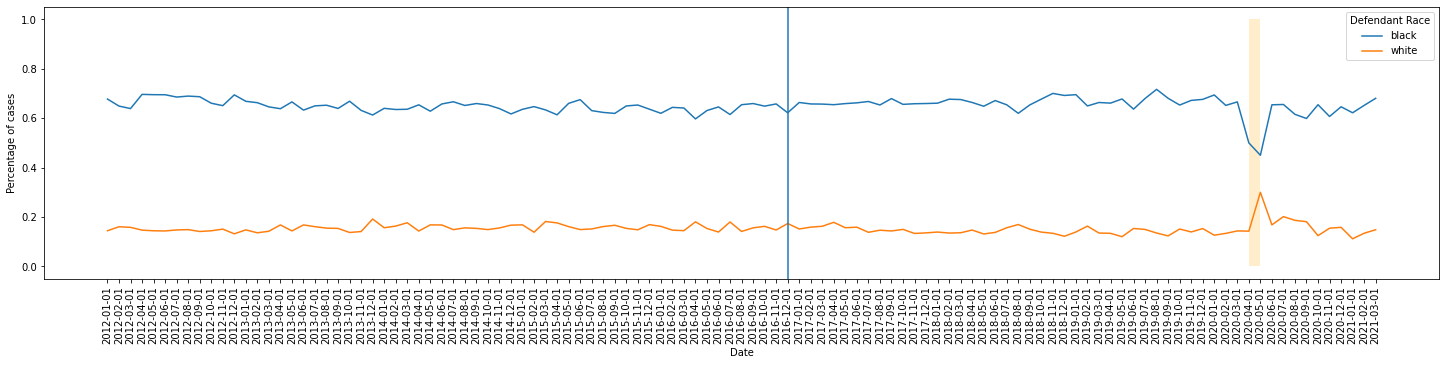

In [25]:
from matplotlib import pyplot as plt

plt.plot(fraction["sentenceym_derived"], fraction["perc_black"], label="black")
plt.plot(fraction["sentenceym_derived"], fraction["perc_white"], label="white")
plt.xlabel("Date")
plt.ylabel("Percentage of cases")
plt.axvline(x="2016-12-01", ymin=0, ymax=1)
plt.fill_between(fraction["sentenceym_derived"], 0, 1,
                where=(fraction['Total'] <= 100),
                facecolor='orange', alpha=0.2)
plt.gcf().set_size_inches(25, 5)
_ = plt.xticks(rotation = 90)
plt.legend(title="Defendant Race")
plt.show()

The disparity between black defendants and white defendants has been relatively constant over the time the data has been collected. In April and May 2020, the disparity between black and white defendants is reduced. This is the same period where the cases were below 100.

## 2.2 Investigating the first type of disparity: probation versus incarceration (10 points)

One type of disparity beyond who arrives at the sentencing stage is whether the defendant receives probation or incaceration.

According to the codebook, incarceration is indicated by `COMMITMENT_TYPE` == "Illinois Department of Corrections"

Recreate the previous plot but where the y axis represents the difference between the following proportions (can be either Black - White or White - Black but make sure to label):

- Percent of black defendants who are incarcerated out of all black defendants that month/year 
- Percent of white defendants who are incarcerated out of all white defendants that month/year 

Briefly interpret the results

Text(0.5, 0, 'Disparity')

Text(0, 0.5, 'Date')

LinearRegression()

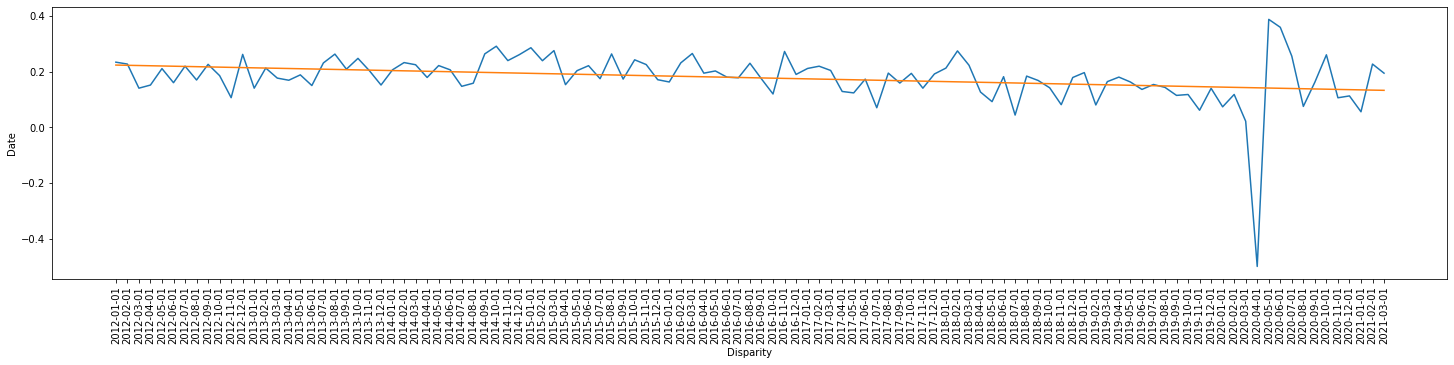

In [26]:
from sklearn.linear_model import LinearRegression

fraction["perc_black_incarcerated"] = clean_df[clean_df["is_black_derived"]]\
.groupby("sentenceym_derived")\
.agg({"COMMITMENT_TYPE": lambda x: (x == "Illinois Department of Corrections").sum() /len(x)})\
.reset_index()["COMMITMENT_TYPE"]

fraction["perc_white_incarcerated"] = clean_df[clean_df["is_white_derived"]]\
.groupby("sentenceym_derived")\
.agg({"COMMITMENT_TYPE": lambda x: (x == "Illinois Department of Corrections").sum() /len(x)})\
.reset_index()["COMMITMENT_TYPE"]

plt.plot(fraction["sentenceym_derived"], fraction["perc_black_incarcerated"]-fraction["perc_white_incarcerated"], label="black-white")
plt.gcf().set_size_inches(25, 5)
plt.xlabel("Disparity")
plt.ylabel("Date")
_ = plt.xticks(rotation = 90)

model = LinearRegression()
model.fit(pd.to_datetime(fraction["sentenceym_derived"]).values.reshape(-1, 1), fraction["perc_black_incarcerated"]-fraction["perc_white_incarcerated"])
y_line = model.predict(pd.to_datetime(fraction["sentenceym_derived"]).values.astype(float).reshape(-1, 1))
plt.plot(fraction["sentenceym_derived"], y_line)

plt.show()

The disparity has remained relatively constant since the beginning of data collection with a large spike in April of 2020.

## 2.3 Investigating mechanisms: incarceration rates by charge

Your colleague sees the previous graph and is worried that the gap could be different---either wider or smaller---if you adjust for the fact that prosecutors have discretion in what crimes to charge defendants with. If white defendants are charged with crimes that tend to receive probation rather than incarceration, that could explain some of the gaps.

In the next questions, you'll begin to investigate this.

### 2.3.1 Find the most common offenses (3 points)

First, create a set of 'frequent offenses' that represent (over the entire period) the union of the 10 offenses Black defendant are most likely to be charged with and the 10 offenses white defendants are most likely to be charged with (might be far less than 20 total if there's a lot of overlap in common charges)

Use the `simplified_offense_derived` for this

In [27]:
frequent_offenses = pd.concat([clean_df[clean_df["is_black_derived"]]["simplified_offense_derived"]\
                               .value_counts().head(10), clean_df[clean_df["is_white_derived"]]
                               ["simplified_offense_derived"].value_counts().head(10)]).drop_duplicates()

### 2.3.2 Look at incarceration rates (again just whether incarcerated) by race and offense type for these top offenses (3 points)

Print a wide-format version of the resulting table (so each row is an offense type, one col is black incarceration rate for that offense type; another is the white incarceration rate) and interpret. What offenses show the largest disparities in judges being less likely to sentence White defendants to incarceration/more likely to offer those defendants probation?


In [28]:
incarc_rate_table = clean_df[clean_df["is_black_derived"] & clean_df["simplified_offense_derived"]\
         .isin(frequent_offenses.reset_index()["index"])]\
.groupby("simplified_offense_derived")\
.agg(Black=("COMMITMENT_TYPE", lambda x: (x == "Illinois Department of Corrections").sum() /len(x)))\

incarc_rate_table["White"] = clean_df[clean_df["is_white_derived"] & clean_df["simplified_offense_derived"]\
         .isin(frequent_offenses.reset_index()["index"])]\
.groupby("simplified_offense_derived")\
.agg(White=("COMMITMENT_TYPE", lambda x: (x == "Illinois Department of Corrections").sum() /len(x)))\

incarc_rate_table["diff"] = incarc_rate_table["Black"] - incarc_rate_table["White"]

display(incarc_rate_table.reset_index().sort_values(by="diff", ascending = False))

,simplified_offense_derived,Black,White,diff
4,Narcotics,0.537876,0.242535,0.295341
0,Battery,0.509032,0.275552,0.233480
10,UUW - Unlawful Use of Weapon,0.696191,0.481973,0.214217
7,Retail Theft,0.595713,0.449582,0.146132
1,Burglary,0.661927,0.535763,0.126164
5,Other Offense,0.340580,0.230228,0.110351
3,Driving With Suspended Or Revoked License,0.582193,0.496552,0.085642
9,Theft,0.386961,0.318721,0.068240
6,Residential Burglary,0.717791,0.654114,0.063677
2,DUI,0.404997,0.341855,0.063143


Narcotics defenses show the largest disparities in sentencing to incarceration between white and black defendants.

### 2.3.3 Examine whether this changes pre and post change to charging threshold for retail theft (14 points)

One important question is not only whether there are disparities by offense type but also whether these disparities are changing over time.

The SAO (State Attorney Office), for instance, announced in December of 2016 that they would no longer default to charging retail thefts of under \$1,000 as felonies. This change might have (1) decreased disparities or (2) increased disparities, depending on the correlation between race/ethnicity and magnitude of goods stolen: https://www.dnainfo.com/chicago/20161215/little-village/kim-foxx-raises-bar-for-retail-theft-felonies/. 

Focusing on `simplified_offense_derived` == "Retail theft." Write a user-defined function that allows you to efficiently: 

- Compare Black-White disparities before and after the change using a two-month bandwidth (so pre is October and November 2016; post is January and February 2017)

- Compare Black-White disparities before and after the change using a four-month bandwidth (so pre is August- November 2016; post is January - April 2017)

- Compare Black-White disparities using an eight-month bandwidth

- Compare Black-White disparities using a twelve-month bandwidth

**Note**: Dec. 2016 is always excluded as a transition month

------------------ 

- Print a table with the results (any organization is fine as long as it's clear)  
 
**Resources**:
    
- User-defined function example in lecture on 09/07

In [29]:
from pandas.tseries.offsets import DateOffset
from datetime import datetime
from dateutil.relativedelta import relativedelta
import math

def compute_error(p, n):
    return math.sqrt(p*(1-p)/n)

def compare_disparities(transition, bandwidth, df, offense):
    pre_dates=[]
    post_dates = []
    for m in range(bandwidth):
        pre_dates.append(datetime.strftime(transition - relativedelta(months=m+1), "%Y-%m-%d"))
        post_dates.append(datetime.strftime(transition + relativedelta(months=m+1), "%Y-%m-%d"))
        
    ret_df = pd.DataFrame()
    
    ret_df["black_pre_change"] = df[np.where((df["sentenceym_derived"].isin(pre_dates)) & 
                        (df["is_black_derived"]) &
                        (df["simplified_offense_derived"] == offense), True, False)]\
            .agg({"COMMITMENT_TYPE": lambda x: (x == "Illinois Department of Corrections").sum() /len(x)})\
    .reset_index(drop=True)
    ret_df["black_post_change"] = df[np.where((df["sentenceym_derived"].isin(post_dates)) & 
                        (df["is_black_derived"]) &
                        (df["simplified_offense_derived"] == offense), True, False)]\
            .agg({"COMMITMENT_TYPE": lambda x: (x == "Illinois Department of Corrections").sum() /len(x)}).reset_index(drop=True)
    
    ret_df["white_pre_change"] = df[np.where((df["sentenceym_derived"].isin(pre_dates)) & 
                        (df["is_white_derived"]) &
                        (df["simplified_offense_derived"] == offense), True, False)]\
            .agg({"COMMITMENT_TYPE": lambda x: (x == "Illinois Department of Corrections").sum() /len(x)}).reset_index(drop=True)
    ret_df["white_post_change"] = df[np.where((df["sentenceym_derived"].isin(post_dates)) & 
                        (df["is_white_derived"]) &
                        (df["simplified_offense_derived"] == offense), True, False)]\
            .agg({"COMMITMENT_TYPE": lambda x: (x == "Illinois Department of Corrections").sum() /len(x)}).reset_index(drop=True)
    
    ret_df["total_pre_change"] = df[np.where((df["sentenceym_derived"].isin(pre_dates)) & 
                        ((df["is_black_derived"]) | (df["is_white_derived"])) &
                        (df["simplified_offense_derived"] == offense), 
                                             True, False)]["CASE_PARTICIPANT_ID"].nunique()
    ret_df["total_post_change"] = df[np.where((df["sentenceym_derived"].isin(post_dates)) & 
                        ((df["is_black_derived"]) | (df["is_white_derived"])) &
                        (df["simplified_offense_derived"] == offense), True, False)]["CASE_PARTICIPANT_ID"].nunique()

    ret_df["pre_change_error"] = compute_error(ret_df["black_pre_change"] - ret_df["white_pre_change"], ret_df["total_pre_change"])
    ret_df["post_change_error"] = compute_error(ret_df["black_post_change"] - ret_df["white_post_change"], ret_df["total_post_change"])

    ret_df["bandwidth"] = str(bandwidth) + " months"
    return ret_df
    
disparities = pd.concat([compare_disparities(datetime.strptime("2016-12-01", "%Y-%m-%d").date(), 2, clean_df, "Retail Theft"),
                        compare_disparities(datetime.strptime("2016-12-01", "%Y-%m-%d").date(), 4, clean_df, "Retail Theft"),
                        compare_disparities(datetime.strptime("2016-12-01", "%Y-%m-%d").date(), 8, clean_df, "Retail Theft"),
                        compare_disparities(datetime.strptime("2016-12-01", "%Y-%m-%d").date(), 12, clean_df, "Retail Theft")])
disparities

,black_pre_change,black_post_change,white_pre_change,white_post_change,total_pre_change,total_post_change,pre_change_error,post_change_error,bandwidth
0,0.626374,0.372340,0.538462,0.217391,234,257,0.018511,0.022572,2 months
0,0.558511,0.411972,0.476923,0.330357,506,396,0.012169,0.013758,4 months
0,0.568990,0.493450,0.436090,0.450000,969,638,0.010905,0.008071,8 months
0,0.580889,0.510714,0.419271,0.446009,1441,773,0.009697,0.008848,12 months


- Use that table to create a bar chart where the x axis represents different bandwidths (2, 4, etc); the y axis the size of the Black-White gap, and for each of the x axis points, you have one shaded bar representing "before" the change, another representing "after" the change (make sure that before is ordered before after and the bandwidths are from smallest to largest)

*Note*: for each of the bandwidths include dates spanning the entire month (e.g., for the first, include not only 02-01-2017 but everything up through 02-28-2017; easiest way is for the subsetting to use the rounded `sentenceym_derived`. Also make sure to only include white or black defendants.


**Hint**: depending on how you calculate/reshape things, you may find this issue useful for how to collapse column names with a multilevel index (also may not need it depending on how you structure the code): https://stackoverflow.com/questions/24290297/pandas-dataframe-with-multiindex-column-merge-levels


**Extra credit**: because the bandwidths have different sample sizes, a better viz incorporates measures of uncertainty. Add standard errors to the points using the formula: $(\dfrac{p(1-p)}{n})^{0.5}$ where N is the number of cases in each bandwidth period

<BarContainer object of 4 artists>

<BarContainer object of 4 artists>

Text(0.5, 0, 'Bandwidth')

Text(0, 0.5, 'Disparity in incarceration for retail theft (black - white)')

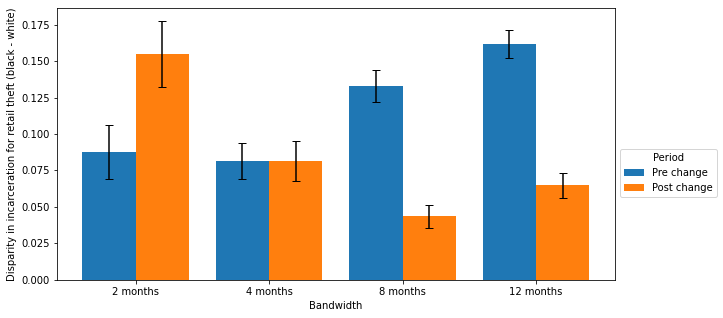

In [30]:
x = np.arange(len(disparities["bandwidth"]))
plt.bar(x-.2, disparities["black_pre_change"] - disparities["white_pre_change"], 0.4, 
        label="Pre change", yerr=disparities["pre_change_error"], capsize=4)
plt.bar(x+.2,disparities["black_post_change"] - disparities["white_post_change"], 0.4, 
        label="Post change", yerr=disparities["post_change_error"], capsize=4)

plt.xlabel("Bandwidth")
plt.ylabel("Disparity in incarceration for retail theft (black - white)")
plt.legend(title="Period",bbox_to_anchor=(1, 0.5))

_tmp = plt.xticks(x, disparities["bandwidth"])
# _tmp = plt.yticks(np.arange(0, .2, step=.01))
plt.gcf().set_size_inches(10, 5)

plt.show()

### 2.3.4 Interpret the results (1 point)

Write a two-sentence interpretation of the results. What might this show about how people on both sides of the issue---those arguing the policy change will narrow disparities; those arguing the change may widen disparities--could support their claims? 

In the short term after the change, the disparity increased, while in the longer term, it decreased. Those arguing the policy change will narrow disparities can support their claims by pointing to the 8 and 12 month bandwidth, while those arguing the change may widen disparities can support their claims by looking to the 2 month bandwidth.

# 3. Extra credit (2 points)

The above question asked about black-white disparities before and after the policy change. Write a new user-defined function that:

- Has an argument(s) to indicate the levels of the `RACE` variable in the original data that will constitute two groups to compare: group 1 and group 2 (eg in one execution of the function, group 1 might be non-Hispanic white; group 2 might be Hispanic and Black; in another execution, group 1 might be Asian; group 2 but might be Hispanic. Note all levels need to be included in a group)
- Can be used to calculate the same bandwidth-specific disparities as above for defendants in those two groups
- Returns a table or plot with the results


In [31]:
def disparities(group1, group2, transition, bandwidth, df, offense):
    pre_dates=[]
    post_dates = []
    for m in range(bandwidth):
        pre_dates.append(datetime.strftime(transition - relativedelta(months=m+1), "%Y-%m-%d"))
        post_dates.append(datetime.strftime(transition + relativedelta(months=m+1), "%Y-%m-%d"))
        
    ret_df = pd.DataFrame()
    
    ret_df[group1 + "_pre_change"] = df[np.where((df["sentenceym_derived"].isin(pre_dates)) & 
                        (df["RACE"] == group1) &
                        (df["simplified_offense_derived"] == offense), True, False)]\
            .agg({"COMMITMENT_TYPE": lambda x: (x == "Illinois Department of Corrections").sum() /len(x)})\
    .reset_index(drop=True)

    ret_df[group1 + "_post_change"] = df[np.where((df["sentenceym_derived"].isin(post_dates)) & 
                        (df["RACE"] == group1) &
                        (df["simplified_offense_derived"] == offense), True, False)]\
            .agg({"COMMITMENT_TYPE": lambda x: (x == "Illinois Department of Corrections").sum() /len(x)}).reset_index(drop=True)
    
    ret_df[group2 + "_pre_change"] = df[np.where((df["sentenceym_derived"].isin(pre_dates)) & 
                        (df["RACE"] == group2) &
                        (df["simplified_offense_derived"] == offense), True, False)]\
            .agg({"COMMITMENT_TYPE": lambda x: (x == "Illinois Department of Corrections").sum() /len(x)}).reset_index(drop=True)
    ret_df[group2 + "_post_change"] = df[np.where((df["sentenceym_derived"].isin(post_dates)) & 
                        (df["RACE"] == group2) &
                        (df["simplified_offense_derived"] == offense), True, False)]\
            .agg({"COMMITMENT_TYPE": lambda x: (x == "Illinois Department of Corrections").sum() /len(x)}).reset_index(drop=True)
    
    ret_df["total_pre_change"] = df[np.where((df["sentenceym_derived"].isin(pre_dates)) & 
                         ((df["RACE"] == group1) | (df["RACE"] == group2)) &
                        (df["simplified_offense_derived"] == offense), 
                                             True, False)]["CASE_PARTICIPANT_ID"].nunique()
    ret_df["total_post_change"] = df[np.where((df["sentenceym_derived"].isin(post_dates)) & 
                         ((df["RACE"] == group1) | (df["RACE"] == group2)) &
                        (df["simplified_offense_derived"] == offense), True, False)]["CASE_PARTICIPANT_ID"].nunique()
    
    ret_df["bandwidth"] = str(bandwidth) + " months"
    return ret_df

disparities = pd.concat([disparities("Black", "White", datetime.strptime("2016-12-01", "%Y-%m-%d").date(), 2, clean_df, "Retail Theft"),
                        disparities("Black", "White", datetime.strptime("2016-12-01", "%Y-%m-%d").date(), 4, clean_df, "Retail Theft"),
                        disparities("Black", "White", datetime.strptime("2016-12-01", "%Y-%m-%d").date(), 8, clean_df, "Retail Theft"),
                        disparities("Black", "White", datetime.strptime("2016-12-01", "%Y-%m-%d").date(), 12, clean_df, "Retail Theft")])
disparities

,Black_pre_change,Black_post_change,White_pre_change,White_post_change,total_pre_change,total_post_change,bandwidth
0,0.631285,0.378378,0.538462,0.217391,231,254,2 months
0,0.571429,0.412186,0.476923,0.330357,494,391,4 months
0,0.578947,0.493304,0.436090,0.450000,950,628,8 months
0,0.590998,0.511840,0.419271,0.446009,1406,762,12 months
